In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fix income
This notebook includes data analysis related to fix income.
* Finding different bond values (and parameters)

In [2]:
def bondvalue(c, T, r, par):
    """
    Computes bv = bond values (current prices) corresponding to all values of yield
    to maturity in the input vector r

    Input:
    c = coupon payment (semiannual)
    T = time to maturity (in years)
    r = vector of yields to maturity (semiannual rates)
    par = par value
    """

    bv = c / r + (par - c/r) * (1 + r) ** (-2 * T)
    return bv

The code that follows computes the price of a bond for 300 semiannual interest rates between 0.02 and 0.05 for a 30 year par $1000 bond with coupon payments of $40. Then interpolation is used to find the yield to maturity if the current price is $1200.

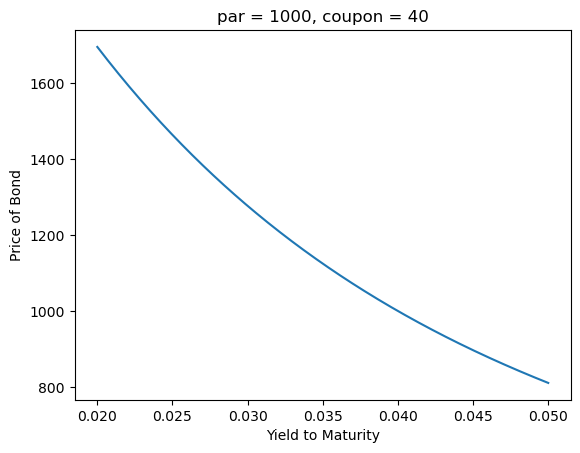

In [14]:
price = 1200
C = 40
T = 30
par = 1000

r = np.linspace(0.02, 0.05, 300)

value = bondvalue(C, T, r, par)
plt.plot(r, value)
plt.xlabel('Yield to Maturity')
plt.ylabel('Price of Bond')
plt.title('par = 1000, coupon = 40')
plt.show()

In [15]:
from scipy.interpolate import CubicSpline

In [20]:
yield_to_maturity_spline = CubicSpline(value[::-1], r[::-1])
yield_to_maturity_at_price = yield_to_maturity_spline(price)

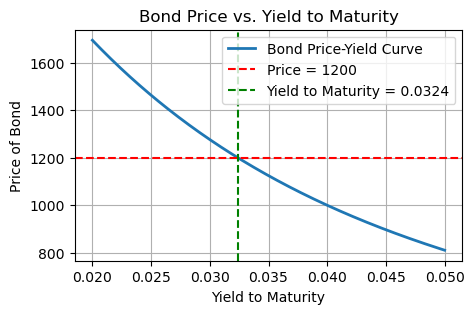

In [24]:
plt.figure(figsize=(5, 3))
plt.plot(r, value, label='Bond Price-Yield Curve', lw=2)
plt.axhline(y=price, color='r', linestyle='--', label=f'Price = {price}')
plt.axvline(x=yield_to_maturity_at_price, color='g', linestyle='--', label=f'Yield to Maturity = {yield_to_maturity_at_price:.4f}')
plt.title('Bond Price vs. Yield to Maturity')
plt.xlabel('Yield to Maturity')
plt.ylabel('Price of Bond')
plt.legend()
plt.grid()
plt.show()

The estimate agree with that from the spline interpolation. When the price is 1200, the yield to maturity is 0.0324.

root_scalar function is used to find the root. For example, we find the roots for function $r^2 - 0.5$ in the following.

In [29]:
from scipy.optimize import root_scalar

def f(r):
    return r**2 - 0.5

rt = root_scalar(f, bracket=[0.7, 0.8])
root = rt.root
print("Root is {}".format(root))

Root is 0.7071067811865475


If we want to use root finding methods to find the YTM, we define the function first, and use the root finding algorithms.

In [31]:
def f(r):
    return 1200 - bondvalue(40, 30, r, 1000)

rt = root_scalar(f, bracket=[0.02, 0.05])
root = rt.root
print("The YTM is {}".format(root))

The YTM is 0.03239812844869621


# More examples

Find the yield to maturity of a par $10,000 bond selling at $9,800
with semiannual coupon payments equal to $280 and maturing in 8 years.

In [32]:
def f(r):
    return 9800 - bondvalue(280, 8, r, 10000)

rt = root_scalar(f, bracket=[0.02, 0.05])
root = rt.root
print("The YTM is {}".format(root))

The YTM is 0.02958719645796281


Find the yield to maturity of the 20-year par
$1,000 bond with semiannual coupon payments of $35 that is selling at $1,050.

In [33]:
def f(r):
    return 1050 - bondvalue(35, 20, r, 1000)

rt = root_scalar(f, bracket=[0.02, 0.05])
root = rt.root
print("The YTM is {}".format(root))

The YTM is 0.03274003736898612


## Also, root finding methods can be used to find other value besides YTM

The yield to maturity is 0.035 on a par $1,000 bond selling at
$950.10 and maturing in 5 years. What is the coupon payment?

In [35]:
def f(c):
    return 950.10 - bondvalue(c, 5, 0.035, 1000)

rt = root_scalar(f, bracket=[0, 500])
root = rt.root
print("The coupon payment is {}".format(root))

The coupon payment is 28.999955743417164
